<a href="https://colab.research.google.com/github/log-ghj/automatic-model-selection/blob/main/Automatic_Model_Selection_Illustration_for_information_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A small example to illustrate the necessity of information reduction with few obvservations and many variables.

In [1]:
# Some imports
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set seed
np.random.seed(123456)

In [3]:
def simulation(n=40, distribution=lognorm):
  # Simulate data
  eps = norm.rvs(loc=0, scale=3, size=n)
  x0 = 3
  y = x0 + eps
  X = np.empty((n, int(n/2)-1))   # -1 since constant is added below
  for i in range(int(n/2)-1):
    X[:,i] = distribution.rvs(s=1,size=n)

  # Put data into dataframes
  X = pd.DataFrame(X)
  y = pd.DataFrame(y)

  # Name x's for use with statsmodel's formula
  names = []
  for i in range(int(n/2)-1):
    name = 'x'+f'{i+1}'
    names.append(name)
  X.columns = names
  data = X.copy()
  data['y'] = y
  data = sm.tools.tools.add_constant(data)
  X = sm.tools.tools.add_constant(X)

  # Split the data
  data_train, data_test = train_test_split(data, test_size=0.5, shuffle=False)
  X_train, X_test = train_test_split(X, test_size=0.5, shuffle=False)
  y_train, y_test = train_test_split(y, test_size=0.5, shuffle=False)

  # Containers for statistics
  MSE_train = np.empty(int(n/2))
  MSE_test = np.empty(int(n/2))
  R2 = np.empty(int(n/2))

  # Run regressions in loop
  formula = 'y ~ -1'    # -1 to have no constant in formula since added it manually
  for i,x in enumerate(X.columns):
    # Append formula
    formula += f' + {x}'
    mod = smf.ols(formula=formula, data=data_train)
    res = mod.fit()

    # Get predictions and save results
    pred_train = res.predict(X_train) 
    pred_test = res.predict(X_test)
    MSE_train[i] = mean_squared_error(y_train, pred_train)
    MSE_test[i] = mean_squared_error(y_test, pred_test)
    R2[i] = res.rsquared

  # Plot the statistics
  titles = ['$R^2$', 'Train MSE', 'Test MSE']
  stats = R2, MSE_train, MSE_test
  fig, ax = plt.subplots(1,3, figsize=(18,6), sharex=True)
  for ax, stat, title in zip(ax, stats, titles):
    ax.plot(range(int(n/2)), stat)
    ax.set_title(title)
    ax.set_xticks(range(0,int(n/2)+1,1))
    ax.set_xticklabels([str(xi) for xi in range(1,int(n/2)+1,1)]) 

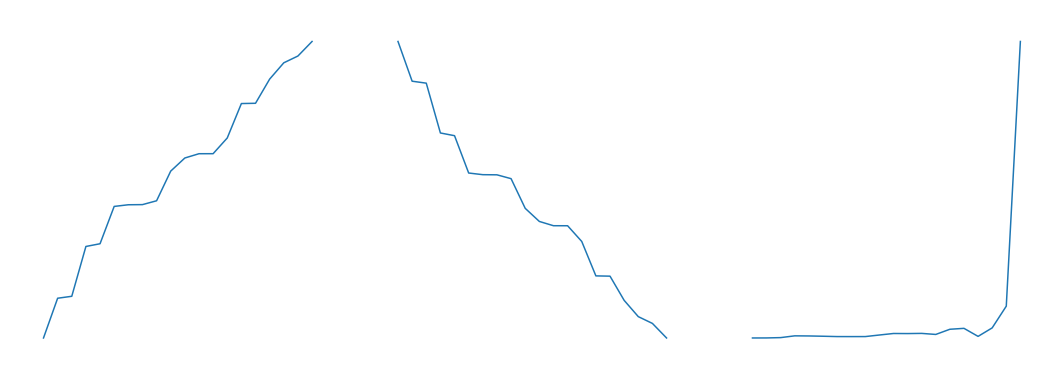

In [4]:
# Change the text color in plots to accomodate dark theme
params = {'ytick.color' :'w',
          'xtick.color' : 'w',
          'axes.labelcolor' : 'w',
          'axes.edgecolor' : 'w',
          'axes.titlecolor': 'w'}
plt.rcParams.update(params)

# Call the function
simulation()